# Handwriting recognition  <br>

The standard example for machine learning these days is the MNIST data set, a collection of 70,000 handwriting samples of the numbers 0-9.<br>

# Problem statement<br>

To predict which number each handwritten image represents.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop

## Getting data

In [3]:
(mnist_train_images, mnist_train_labels), (mnist_test_images, mnist_test_labels) = mnist.load_data()

## Splitting data into train and test

In [4]:
train_images = mnist_train_images.reshape(60000, 784)
test_images = mnist_test_images.reshape(10000, 784)
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
train_images /= 255
test_images /= 255

## One-hot encode

In [5]:
train_labels = keras.utils.to_categorical(mnist_train_labels, 10)
test_labels = keras.utils.to_categorical(mnist_test_labels, 10)

## Visualize input data

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


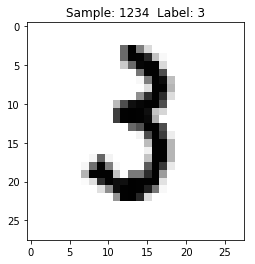

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

def display_sample(num):
    #Print the one-hot array of this sample's label 
    print(train_labels[num])  
    #Print the label converted back to a number
    label = train_labels[num].argmax(axis=0)
    #Reshape the 768 values to a 28x28 image
    image = train_images[num].reshape([28,28])
    plt.title('Sample: %d  Label: %d' % (num, label))
    plt.imshow(image, cmap=plt.get_cmap('gray_r'))
    plt.show()
    
display_sample(1234)

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


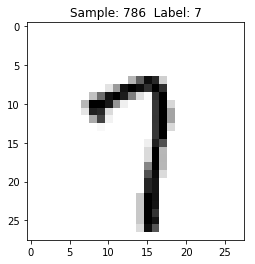

In [7]:
display_sample(786)

## Setting model

In [8]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dense(10, activation='softmax'))

In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


## Complie model

In [10]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

In [11]:
history = model.fit(train_images, train_labels,
                    batch_size=100,
                    epochs=10,
                    verbose=2,
                    validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 6s - loss: 0.2394 - acc: 0.9318 - val_loss: 0.1239 - val_acc: 0.9636
Epoch 2/10
 - 6s - loss: 0.0968 - acc: 0.9716 - val_loss: 0.0894 - val_acc: 0.9729
Epoch 3/10
 - 6s - loss: 0.0649 - acc: 0.9807 - val_loss: 0.0699 - val_acc: 0.9779
Epoch 4/10
 - 6s - loss: 0.0479 - acc: 0.9853 - val_loss: 0.0703 - val_acc: 0.9786
Epoch 5/10
 - 6s - loss: 0.0357 - acc: 0.9890 - val_loss: 0.0715 - val_acc: 0.9782
Epoch 6/10
 - 6s - loss: 0.0272 - acc: 0.9917 - val_loss: 0.0676 - val_acc: 0.9796
Epoch 7/10
 - 6s - loss: 0.0215 - acc: 0.9936 - val_loss: 0.0697 - val_acc: 0.9800
Epoch 8/10
 - 6s - loss: 0.0160 - acc: 0.9954 - val_loss: 0.0677 - val_acc: 0.9826
Epoch 9/10
 - 6s - loss: 0.0126 - acc: 0.9960 - val_loss: 0.0692 - val_acc: 0.9828
Epoch 10/10
 - 6s - loss: 0.0103 - acc: 0.9970 - val_loss: 0.0762 - val_acc: 0.9812


## Accuracy

In [12]:
score = model.evaluate(test_images, test_labels, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.07618108206391444
Test accuracy: 0.9812


# Visualize results

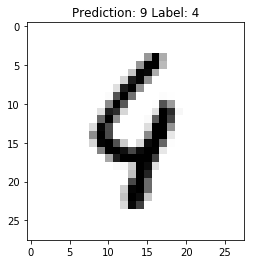

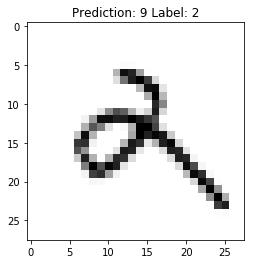

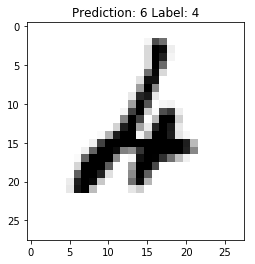

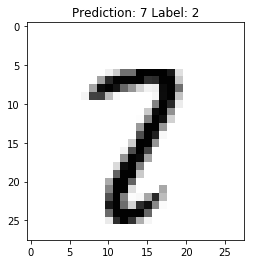

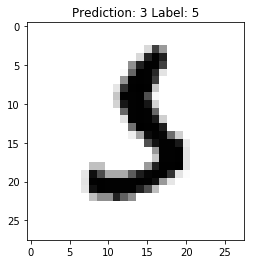

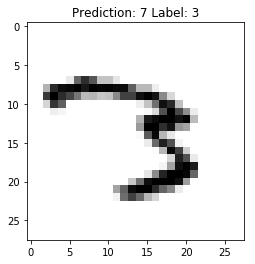

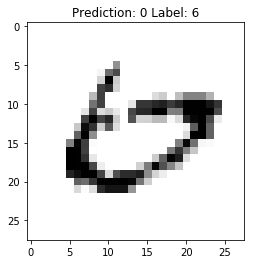

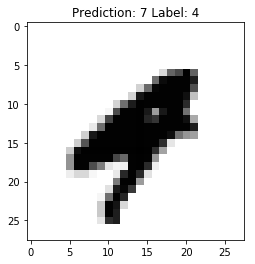

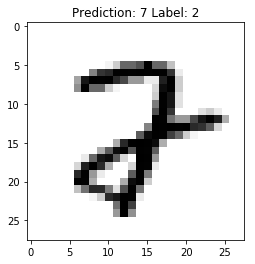

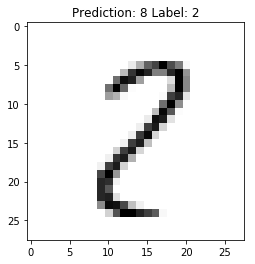

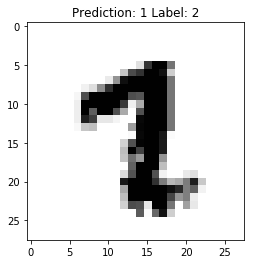

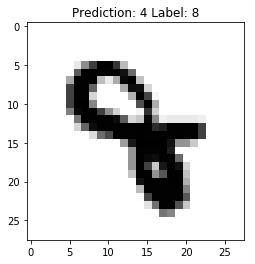

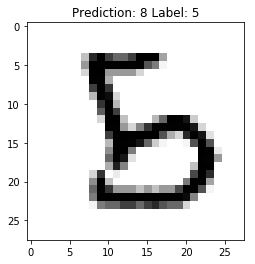

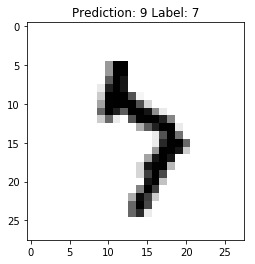

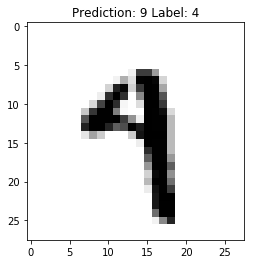

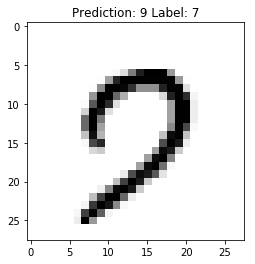

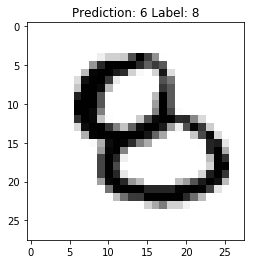

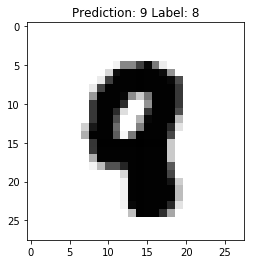

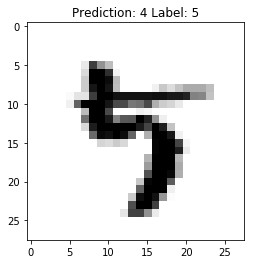

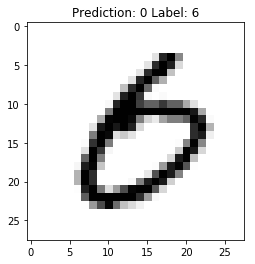

In [13]:
for x in range(1000):
    test_image = test_images[x,:].reshape(1,784)
    predicted_cat = model.predict(test_image).argmax()
    label = test_labels[x].argmax()
    if (predicted_cat != label):
        plt.title('Prediction: %d Label: %d' % (predicted_cat, label))
        plt.imshow(test_image.reshape([28,28]), cmap=plt.get_cmap('gray_r'))
        plt.show()

## Other optimizer

In [14]:
from keras import optimizers
from keras.optimizers import SGD
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

Using TensorFlow backend.


In [15]:
history = model.fit(train_images, train_labels,
                    batch_size=100,
                    epochs=10,
                    verbose=2,
                    validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 4s - loss: 0.0043 - acc: 0.9991 - val_loss: 0.0701 - val_acc: 0.9823
Epoch 2/10
 - 4s - loss: 0.0034 - acc: 0.9994 - val_loss: 0.0683 - val_acc: 0.9832
Epoch 3/10
 - 4s - loss: 0.0031 - acc: 0.9995 - val_loss: 0.0674 - val_acc: 0.9833
Epoch 4/10
 - 4s - loss: 0.0029 - acc: 0.9995 - val_loss: 0.0667 - val_acc: 0.9834
Epoch 5/10
 - 4s - loss: 0.0028 - acc: 0.9995 - val_loss: 0.0662 - val_acc: 0.9835
Epoch 6/10
 - 4s - loss: 0.0027 - acc: 0.9995 - val_loss: 0.0659 - val_acc: 0.9835
Epoch 7/10
 - 4s - loss: 0.0026 - acc: 0.9996 - val_loss: 0.0655 - val_acc: 0.9834
Epoch 8/10
 - 4s - loss: 0.0025 - acc: 0.9996 - val_loss: 0.0653 - val_acc: 0.9835
Epoch 9/10
 - 4s - loss: 0.0025 - acc: 0.9996 - val_loss: 0.0651 - val_acc: 0.9838
Epoch 10/10
 - 4s - loss: 0.0024 - acc: 0.9996 - val_loss: 0.0649 - val_acc: 0.9838


In [16]:
score = model.evaluate(test_images, test_labels, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.06487321836157699
Test accuracy: 0.9838


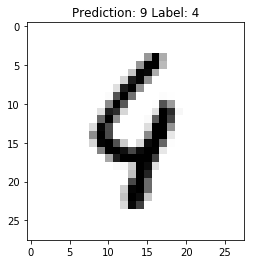

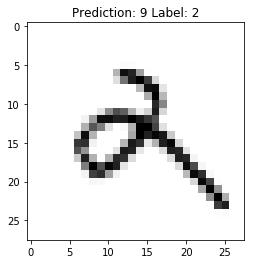

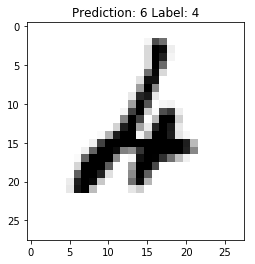

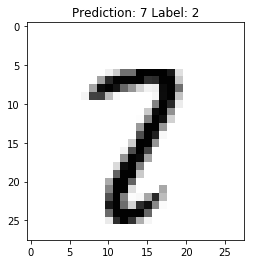

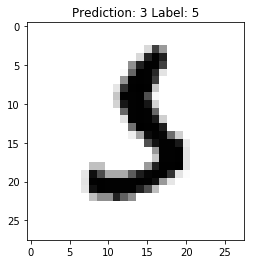

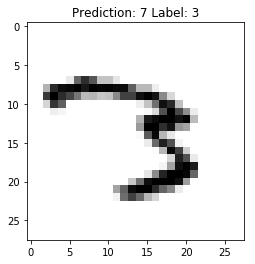

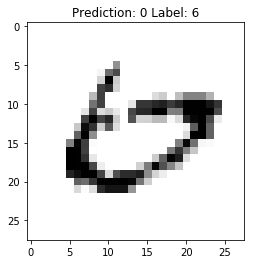

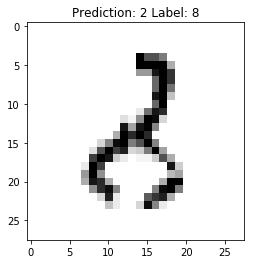

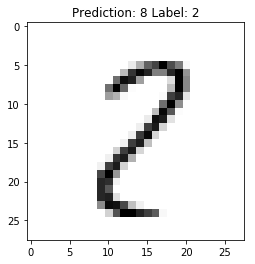

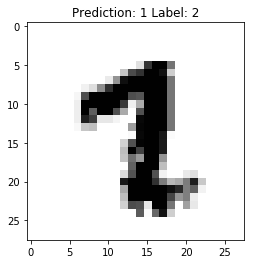

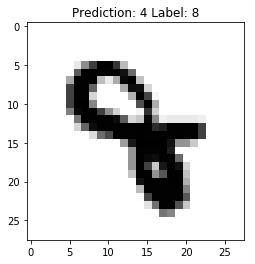

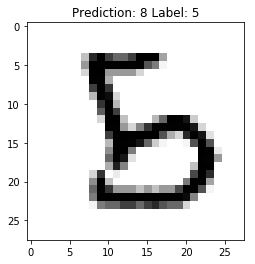

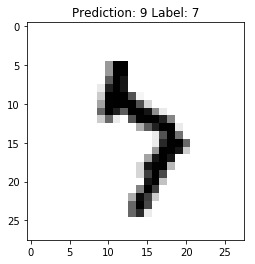

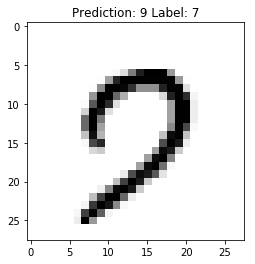

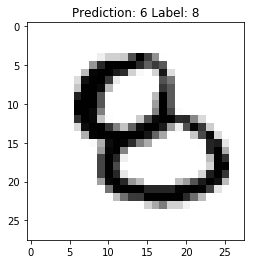

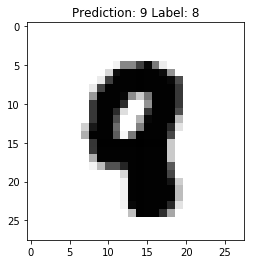

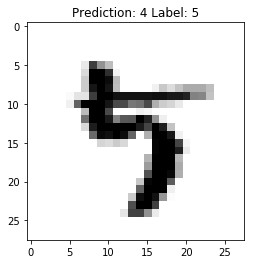

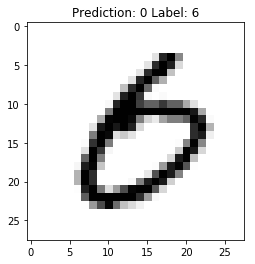

In [17]:
for x in range(1000):
    test_image = test_images[x,:].reshape(1,784)
    predicted_cat = model.predict(test_image).argmax()
    label = test_labels[x].argmax()
    if (predicted_cat != label):
        plt.title('Prediction: %d Label: %d' % (predicted_cat, label))
        plt.imshow(test_image.reshape([28,28]), cmap=plt.get_cmap('gray_r'))
        plt.show()